En este archivo, vamos a hacer el proceso de análisis exploratorio de datos (EDA, por sus siglas en inglés) a los datasets de los taxis correspondientes al periodo Enero-Marzo del año 2024. 
Consideramos este periodo cómo adeacuado, porque además de estar actualizado, representa un 12,5% del conjunto de datos totales que vamos a usar para nuestro trabajo.

Comenzamos importando las librerías necesarias para hacer nuestro trabajo

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from ETL_functions import *
import folium
from folium.plugins import HeatMap

Cargamos los datasets en 3 dataframes de pandas y los mostramos en pantalla

In [48]:
registros_taxis_enero = pd.read_parquet("Datasets\yellow_tripdata_2024-01.parquet")
registros_taxis_enero

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [49]:
registros_taxis_febrero = pd.read_parquet("Datasets\yellow_tripdata_2024-02.parquet")
registros_taxis_febrero

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-02-01 00:04:45,2024-02-01 00:19:58,1.0,4.39,1.0,N,68,236,1,20.50,1.0,0.5,1.28,0.00,1.0,26.78,2.5,0.00
1,2,2024-02-01 00:56:31,2024-02-01 01:10:53,1.0,7.71,1.0,N,48,243,1,31.00,1.0,0.5,9.00,0.00,1.0,45.00,2.5,0.00
2,2,2024-02-01 00:07:50,2024-02-01 00:43:12,2.0,28.69,2.0,N,132,261,2,70.00,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,1,2024-02-01 00:01:49,2024-02-01 00:10:47,1.0,1.10,1.0,N,161,163,1,9.30,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.00
4,1,2024-02-01 00:37:35,2024-02-01 00:51:15,1.0,2.60,1.0,N,246,79,2,15.60,3.5,0.5,0.00,0.00,1.0,20.60,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007521,2,2024-02-29 23:20:17,2024-02-29 23:28:25,NaN,0.35,NaN,None,164,170,0,21.02,0.0,0.5,0.00,0.00,1.0,25.02,NaN,NaN
3007522,2,2024-02-29 23:38:37,2024-02-29 23:49:37,NaN,1.99,NaN,None,249,45,0,18.78,0.0,0.5,0.00,0.00,1.0,22.78,NaN,NaN
3007523,2,2024-02-29 23:14:40,2024-02-29 23:19:29,NaN,0.84,NaN,None,113,249,0,8.82,0.0,0.5,0.00,0.00,1.0,12.82,NaN,NaN
3007524,1,2024-02-29 23:12:06,2024-02-29 23:21:53,NaN,0.00,NaN,None,164,107,0,14.37,0.0,0.5,0.00,0.00,1.0,18.37,NaN,NaN


In [ ]:
registros_taxis_marzo = pd.read_parquet("Datasets\yellow_tripdata_2024-03.parquet")
registros_taxis_marzo

In [ ]:
print(f"Originalmente, tenemos {len(registros_taxis_enero.index)+len(registros_taxis_febrero.index)+len(registros_taxis_marzo)} filas, en promedio en cada dataset hay {int((len(registros_taxis_enero.index)+len(registros_taxis_febrero.index)+len(registros_taxis_marzo))/3)} filas")

Originalmente, tenemos 9554778 filas, en promedio en cada dataset hay 3184926 filas


Lo primero que vamos a hacer es combinar estos 3 dataframes, para que, en lugar de trabajarlos por separado, lo trabajemos en un único dataframe. Para esto hacemos un merge, que se encarga de poner un dataframe debajo del otro

In [ ]:
registros_taxis = pd.concat([registros_taxis_enero, registros_taxis_febrero, registros_taxis_marzo])
registros_taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582623,2,2024-03-31 23:16:45,2024-03-31 23:29:20,NaN,4.27,NaN,None,130,218,0,14.27,0.0,0.5,0.00,0.0,1.0,15.77,NaN,NaN
3582624,1,2024-03-31 23:29:28,2024-03-31 23:43:47,NaN,0.00,NaN,None,79,100,0,14.00,1.0,0.5,3.80,0.0,1.0,24.80,NaN,NaN
3582625,2,2024-03-31 23:15:00,2024-03-31 23:47:29,NaN,6.44,NaN,None,63,181,0,30.00,0.0,0.5,0.00,0.0,1.0,31.50,NaN,NaN
3582626,2,2024-03-31 23:27:53,2024-03-31 23:45:44,NaN,3.88,NaN,None,161,148,0,22.32,0.0,0.5,5.26,0.0,1.0,31.58,NaN,NaN


Lo que hacemos a continuación es aplicarle el proceso de ETL, las funciones aplicadas fueron extraídas y optimizadas de un archivo llamado etl_taxis, en el cuál explicamos con más detalle porque realizamos las transformaciones que hicimos.

In [ ]:
# La primera función se encarga de filtrar el dataset para dejar únicamente aquellos registros que sean dentro del distrito de Manhattan
registros_taxis = filtrar_datasets(registros_taxis)

Unable to allocate 553. MiB for an array with shape (9, 8051515) and data type float64


In [ ]:
registros_taxis

Podemos ver que, elegimos Manhattan porque es una parte muy significativa del conjunto de datos, pese dejar en el dataframe sólo aquellos viajes ocurridos en este distrito, nuestro conjunto de datos sólo se redujo un 15%.

In [ ]:
# Dentro del equipo de Data Logic, nos pusimos de acuerdo en cuáles columnas iban a ser relevantes para nuestro análisis, y lo que hace esta función es conservarlas
registros_taxis = eliminar_columnas_no_relevantes(registros_taxis)
registros_taxis

'NoneType' object has no attribute 'columns'


In [ ]:
registros_taxis['trip_distance'].nlargest(15)

In [ ]:
registros_taxis = registros_taxis[(registros_taxis["trip_distance"] >= 0) & (registros_taxis["trip_distance"] <= 100)]

## Para poder visualizar los cambios realizados anteriormente, presentamos el siguiente gráfico

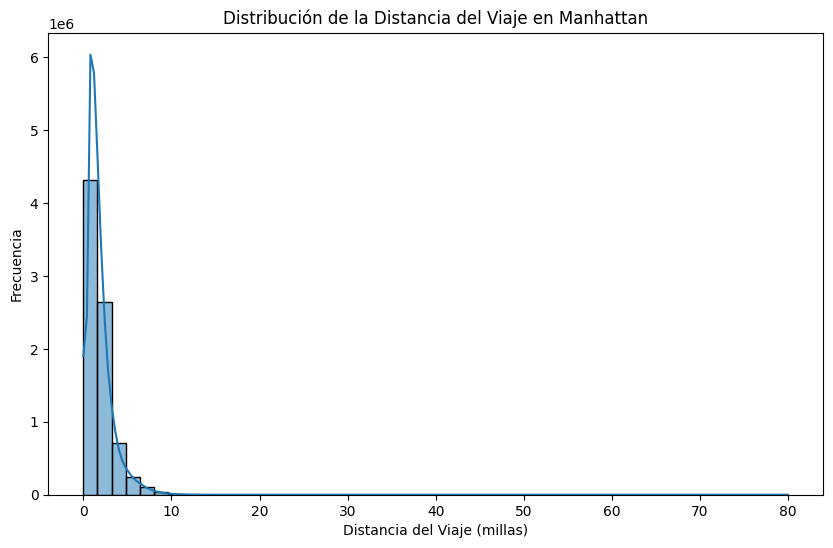

In [ ]:
#Grafico exploratorio de datos
plt.figure(figsize=(10, 6))
sns.histplot(registros_taxis['trip_distance'], bins=50, kde=True)
plt.title('Distribución de la Distancia del Viaje en Manhattan')
plt.xlabel('Distancia del Viaje (millas)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
registros_taxis = registros_taxis[(registros_taxis["tpep_pickup_datetime"] >= "2024-01-01") & (registros_taxis["tpep_pickup_datetime"] <= "2024-03-31")]

## Cantidad de Viajes por Día

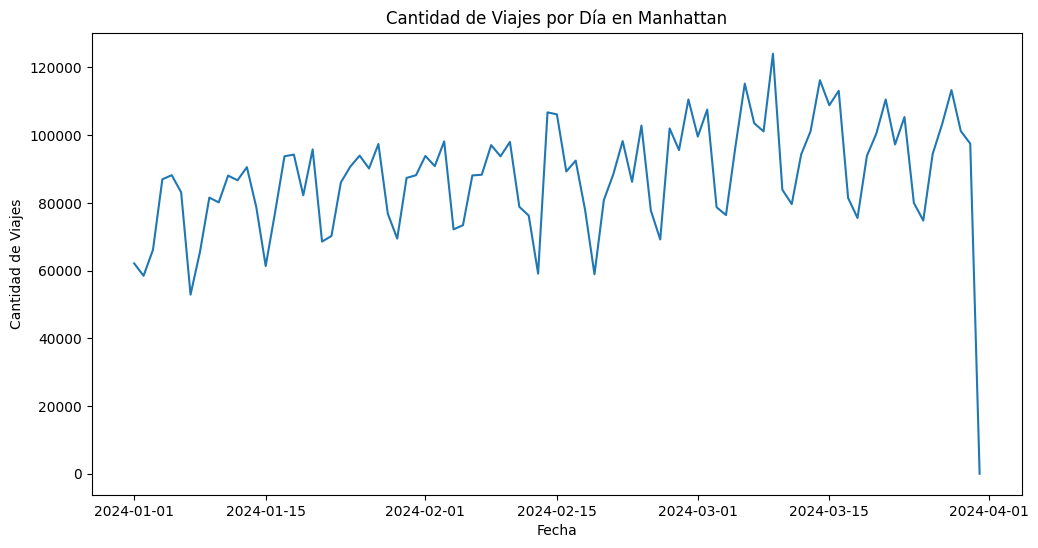

In [ ]:
#Cantidad de Viajes por Día
registros_taxis['tpep_pickup_datetime'] = pd.to_datetime(registros_taxis['tpep_pickup_datetime'])
registros_taxis['pickup_date'] = registros_taxis['tpep_pickup_datetime'].dt.date

trips_per_day = registros_taxis.groupby('pickup_date').size()

plt.figure(figsize=(12, 6))
trips_per_day.plot()
plt.title('Cantidad de Viajes por Día en Manhattan')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Viajes')
plt.show()

## Recaudación Total por Día

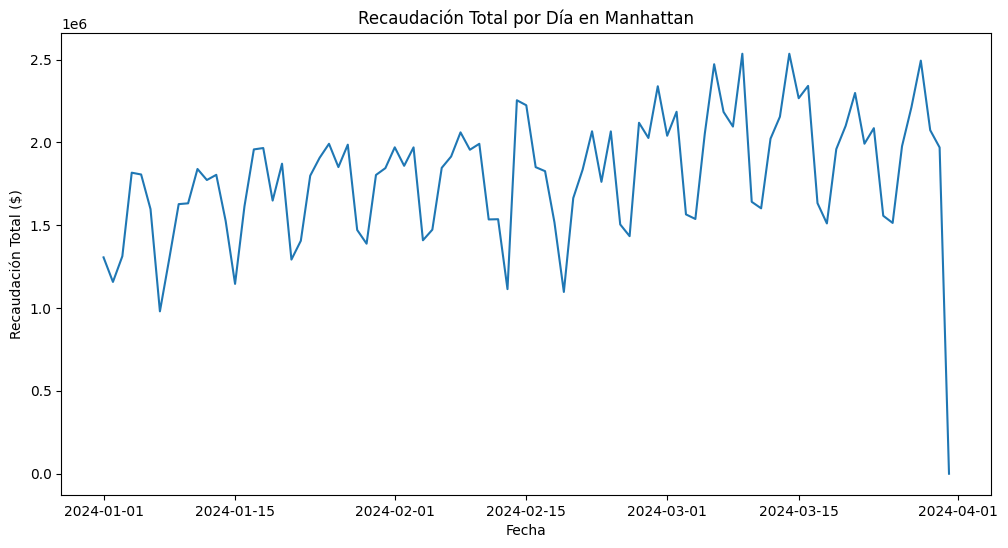

In [ ]:
#Recaudación Total por Día
total_amount_per_day = registros_taxis.groupby('pickup_date')['total_amount'].sum()

plt.figure(figsize=(12, 6))
total_amount_per_day.plot()
plt.title('Recaudación Total por Día en Manhattan')
plt.xlabel('Fecha')
plt.ylabel('Recaudación Total ($)')
plt.show()

C:\Users\crisr\AppData\Local\Temp\ipykernel_16832\2583968461.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[2].add_patch(plt.Rectangle((0, 0), 1, 1, color='gray', edgecolor='black', label='Dataset original'))
C:\Users\crisr\AppData\Local\Temp\ipykernel_16832\2583968461.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[2].add_patch(plt.Rectangle((0, 1 - 8051515 / 9554778), 8 / 19, 8051515 / 9554778, color='white', edgecolor='black', label='Dataset luego de la transformación'))


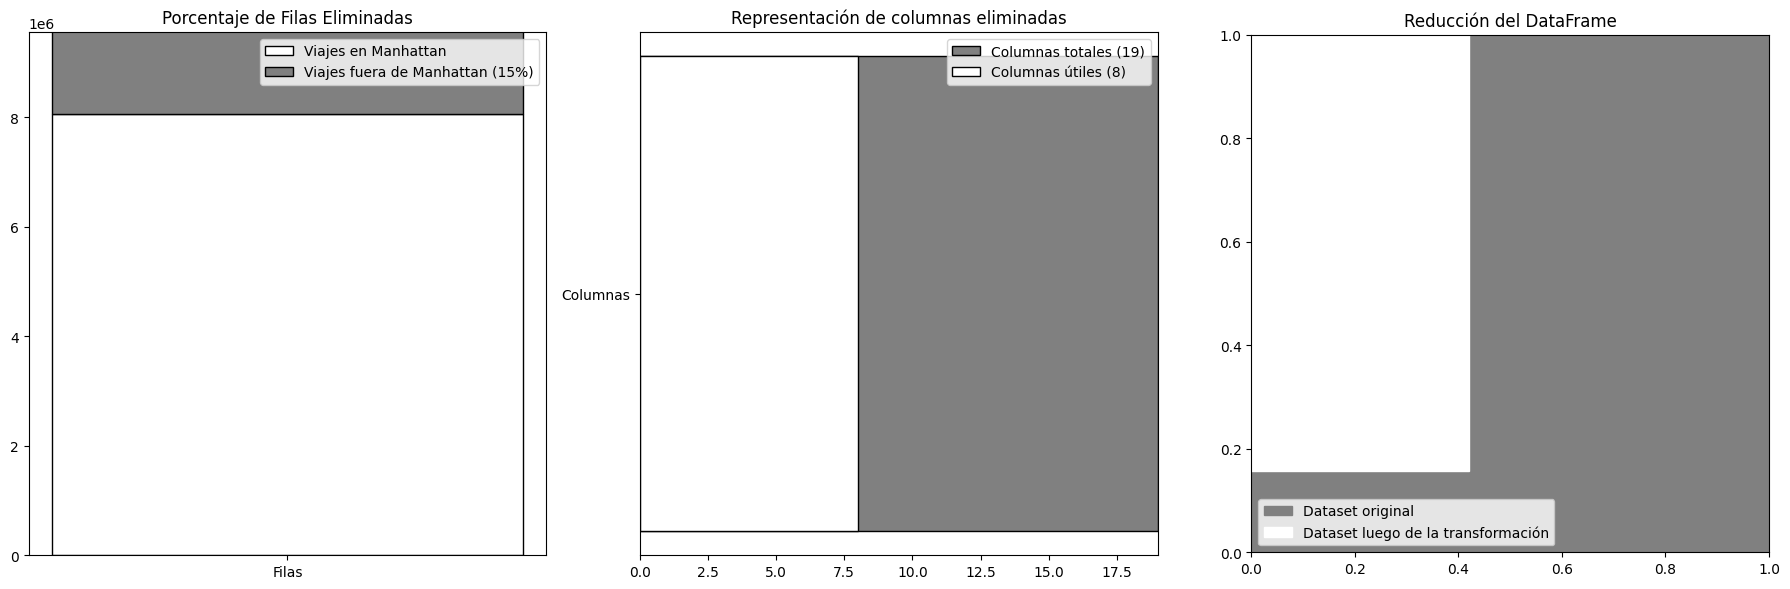

In [27]:
porcentaje_columnas_eliminadas = round((19-8)/19,2)

# Creamos la figura y sus ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Porcentaje de filas eliminadas
axs[0].bar(['Filas'], [8051515], color='white', edgecolor='black', label='Viajes en Manhattan')
axs[0].bar(['Filas'], [9554778], color='gray',bottom=[8051515], edgecolor='black', label='Viajes fuera de Manhattan (15%)')
axs[0].set_title('Porcentaje de Filas Eliminadas')
axs[0].set_ylim(0, 9554778)
axs[0].legend()

# Gráfico 2: Porcentaje de columnas eliminadas
axs[1].barh(['Columnas'], [19], color='gray', edgecolor='black',label='Columnas totales (19)')
axs[1].barh(['Columnas'], [8], color='white', edgecolor='black',label='Columnas útiles (8)')
axs[1].set_title('Representación de columnas eliminadas')
axs[1].set_xlim(0, 19)
axs[1].legend()

# Gráfico 3: Representación del DataFrame reducido
axs[2].add_patch(plt.Rectangle((0, 0), 1, 1, color='gray', edgecolor='black', label='Dataset original'))
axs[2].add_patch(plt.Rectangle((0, 1 - 8051515 / 9554778), 8 / 19, 8051515 / 9554778, color='white', edgecolor='black', label='Dataset luego de la transformación'))
axs[2].set_title('Reducción del DataFrame')
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_aspect('equal')
axs[2].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()
